### Microlens Generator
CC T. Anguita & F. Förster

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# microlens parameter and event generators
import sys
sys.path.append("../lib")
from microlensing import *

In [2]:
# generate parameter generator object and sample parameters
parfile = "test.txt" # here put your favourite file with columns tE, U0 and fs, in data directory
pargen = microlens_pars(parsfile = "../data/%s" % parfile)
nsample = 100
pars = pargen.sample(nsample)

../lib/microlensing.py:24: RuntimeWarning: divide by zero encountered in true_divide
  u = np.sqrt(self.U0**2 + ((times - self.t0)  /self.tE )**2)
../lib/microlensing.py:25: RuntimeWarning: invalid value encountered in true_divide
  A = (u**2 + 2.) / (u * np.sqrt(u**2 + 3))


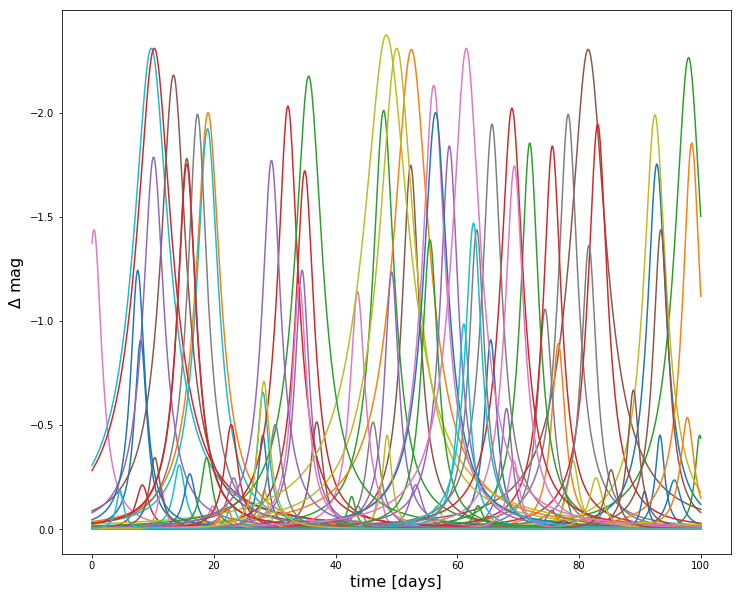

In [3]:
# define times and plot
dt = 100
times = np.linspace(0, 100, 1000)

fig, ax = plt.subplots(figsize = (12, 10))

# loop among physical parameters, create microlens events and sample light curve
for tE, U0, fs in zip(pars['tE'], pars['U0'], pars['fs']):
    t0 = np.random.random() * dt
    ml = microlens(tE = tE, U0 = U0, fs = fs, t0 = t0)
    ax.plot(times, ml.eval(times))
    
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("time [days]", fontsize = 16)
ax.set_ylabel("$\Delta$ mag", fontsize = 16)